# Predicting Aqueous Solubility of Organic Molecules Using Molecular Descriptor Model 

## ML model: Random Forest Regressor

## ML features: physico-chemical descriptors obtained with PaDEL software

according to article **"Predicting Aqueous Solubility of Organic Molecules Using Deep Learning Models withVaried Molecular Representations"** by Panapitiya et al, 2021 *(https://arxiv.org/pdf/2105.12638v1.pdf)*, Molecular Descriptor Model overperforms fully connected neural networks (FCNNs), recurrent neural networks (RNNs), graph neural networks (GNNs), and SchNet.

## Training Dataset: ESOL Delaney, Water solubility data (**LogS**, log solubility in mols per litre) for common organic small molecules.

dataset is obtained from https://moleculenet.org/datasets-1 , original data **Delaney "ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure"** *J. Chem. Inf. Comput. Sci.* 2004, **44**, 3, 1000–1005)

In [1]:
import pandas as pd
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
from padelpy import from_smiles, padeldescriptor

In [5]:
# Loading training dataset
df = pd.read_csv('Input/solubility_delaney_processed.csv')
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


In [6]:
df.describe()

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


In [7]:
df.shape

(1128, 10)

In [8]:
y = df[['smiles', 'Compound ID', 'measured log solubility in mols per litre', 'ESOL predicted log solubility in mols per litre']]

In [9]:
y = y.rename(columns={'measured log solubility in mols per litre': 'measured', \
                      'ESOL predicted log solubility in mols per litre':'ESOL'})

In [10]:
y.head()

,smiles,Compound ID,measured,ESOL
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,Amigdalin,-0.77,-0.974
1,Cc1occc1C(=O)Nc2ccccc2,Fenfuram,-3.30,-2.885
2,CC(C)=CCCC(C)=CC(=O),citral,-2.06,-2.579
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,Picene,-7.87,-6.618
4,c1ccsc1,Thiophene,-1.33,-2.232


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  3.,  6.,  6.,
        11.,  7.,  4., 12., 11.,  6., 14., 15., 16., 15., 19., 30., 29.,
        43., 48., 48., 42., 57., 57., 54., 52., 61., 66., 64., 49., 40.,
        48., 40., 34., 27., 21., 14., 23., 13.,  7.,  8.,  3.]),
 array([-1.16000e+01, -1.13364e+01, -1.10728e+01, -1.08092e+01,
        -1.05456e+01, -1.02820e+01, -1.00184e+01, -9.75480e+00,
        -9.49120e+00, -9.22760e+00, -8.96400e+00, -8.70040e+00,
        -8.43680e+00, -8.17320e+00, -7.90960e+00, -7.64600e+00,
        -7.38240e+00, -7.11880e+00, -6.85520e+00, -6.59160e+00,
        -6.32800e+00, -6.06440e+00, -5.80080e+00, -5.53720e+00,
        -5.27360e+00, -5.01000e+00, -4.74640e+00, -4.48280e+00,
        -4.21920e+00, -3.95560e+00, -3.69200e+00, -3.42840e+00,
        -3.16480e+00, -2.90120e+00, -2.63760e+00, -2.37400e+00,
        -2.11040e+00, -1.84680e+00, -1.58320e+00, -1.31960e+00,
        -1.05600e+00, -7.92400e-01, -5.28800e-01, -2.65200e-01,
        -1.6

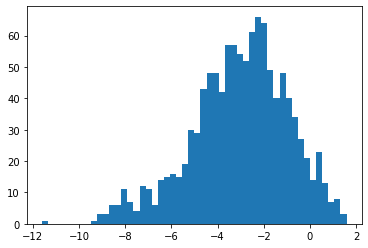

In [12]:
plt.hist(y['measured'], bins = 50)

In [13]:
y.loc[y.measured <= -2].shape

(761, 4)

In [14]:
y[['smiles', 'measured']].to_csv('Output/esol.smi', header=None, index=None, sep='\t')

In [15]:
padeldescriptor(mol_dir='Output/esol.smi', d_file='Output/esol_descriptors.csv', d_2d=True, d_3d=True)

In [16]:
x1 = pd.read_csv('Output/esol_descriptors.csv', low_memory = False)
x1

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,-3.300,0,-0.3494,0.122080,14.7931,31.158723,11,11,26,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.060,0,2.4893,6.196614,50.2393,29.070688,0,0,27,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.770,0,-4.0765,16.617852,76.9126,63.125411,6,6,59,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.330,0,0.5906,0.348808,7.7935,12.607172,5,5,9,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.500,0,0.5906,0.348808,7.7935,19.653965,9,10,14,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,-7.660,0,5.2101,27.145142,39.3092,38.380379,12,13,22,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124,0.106,0,0.3157,0.099666,53.0132,29.594309,0,0,27,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1125,-3.091,0,2.5297,6.399382,64.0447,34.495895,0,0,27,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126,-3.180,0,0.3362,0.113030,23.0781,16.801516,0,0,17,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
x1 = x1.rename(columns={'Name': 'Measured'})

In [18]:
x1 = x1.dropna(axis=1, how='all')

In [19]:
# replacing Infinity with Nan
x1 = x1.replace([np.inf, -np.inf, 'Infinity', '=-Infinity', '#NAME\?'], np.nan, regex=True)

In [20]:
# check for missing values
x1.isna().values.any()

True

In [21]:
# replacing missing values with numeric column Median (or '.' for non-numeric)
x2 = x1.apply(lambda a: a.fillna(a.median()) if a.dtype.kind in 'biufc' else a.fillna('.'))

In [22]:
# check for missing values
x2.isin([np.nan, np.inf, -np.inf]).values.any()

False

In [23]:
x2.shape

(1128, 1445)

In [24]:
x2

,Measured,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-3.300,0,-0.3494,0.122080,14.7931,31.158723,11,11,26,15,...,7.733807,30.174160,2.011611,8.556221,5.511983,3.044238,384.0,18.0,3.085,74.0
1,-2.060,0,2.4893,6.196614,50.2393,29.070688,0,0,27,11,...,5.634078,20.486117,1.862374,2.404409,2.404409,0.000000,194.0,9.0,2.701,42.0
2,-0.770,0,-4.0765,16.617852,76.9126,63.125411,6,6,59,32,...,7.748448,64.154023,2.004813,32.578389,30.089924,2.488464,3080.0,56.0,-0.640,164.0
3,-1.330,0,0.5906,0.348808,7.7935,12.607172,5,5,9,5,...,9.333708,9.687500,1.937500,2.875000,0.000000,0.000000,15.0,0.0,2.119,20.0
4,-1.500,0,0.5906,0.348808,7.7935,19.653965,9,10,14,9,...,9.643876,18.559054,2.062117,6.100841,0.000000,3.050420,79.0,9.0,2.140,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,-7.660,0,5.2101,27.145142,39.3092,38.380379,12,13,22,19,...,17.809338,37.527354,1.975124,17.657884,0.000000,0.000000,642.0,35.0,5.432,100.0
1124,0.106,0,0.3157,0.099666,53.0132,29.594309,0,0,27,14,...,8.113621,26.151609,1.867972,19.223155,7.855698,8.612340,337.0,17.0,0.370,58.0
1125,-3.091,0,2.5297,6.399382,64.0447,34.495895,0,0,27,12,...,9.111007,22.418363,1.868197,17.045679,5.397074,0.000000,234.0,13.0,3.321,48.0
1126,-3.180,0,0.3362,0.113030,23.0781,16.801516,0,0,17,5,...,4.240818,8.696802,1.739360,0.000000,0.000000,0.000000,18.0,2.0,3.124,16.0


In [25]:
x2.to_csv('Output/esol_descriptors_clean.csv')

In [26]:
scaler = MinMaxScaler()
x2_scaled = scaler.fit_transform(x2.iloc[:,1:])
x2_scaled

array([[0.        , 0.453257  , 0.00220369, ..., 0.15929204, 0.39597955,
        0.23125   ],
       [0.        , 0.65243047, 0.11185578, ..., 0.07964602, 0.3767295 ,
        0.13125   ],
       [0.        , 0.19175016, 0.29997071, ..., 0.49557522, 0.20924403,
        0.5125    ],
       ...,
       [0.        , 0.65526508, 0.11551596, ..., 0.11504425, 0.40781031,
        0.15      ],
       [0.        , 0.50136117, 0.00204033, ..., 0.01769912, 0.39793463,
        0.05      ],
       [0.        , 0.66400747, 0.12717565, ..., 0.26548673, 0.41477842,
        0.2875    ]])

In [27]:
x2_scaled.shape

(1128, 1444)

In [28]:
# Model pre-training to determine most important features
rf_reg = RandomForestRegressor(n_estimators=30, random_state=42)
rf_reg

RandomForestRegressor(n_estimators=30, random_state=42)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x2_scaled, \
                                   x2.Measured, random_state=42, test_size=0.2, shuffle=True)

In [30]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=42)

In [31]:
predicted = rf_reg.predict(X_test) # The predictions from your ML / RF model

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, predicted, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, predicted))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, predicted))
print('Max Error:', metrics.max_error(y_test, predicted))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, predicted))
print('R^2:', metrics.r2_score(y_test, predicted))


Mean Absolute Error (MAE): 0.4859153638151426
Mean Squared Error (MSE): 0.4574700527691741
Root Mean Squared Error (RMSE): 0.676365324931116
Mean Absolute Percentage Error (MAPE): 0.4447242533836387
Explained Variance Score: 0.9005240564338721
Max Error: 2.7802
Median Absolute Error: 0.3325333333333331
R^2: 0.9000915690874347


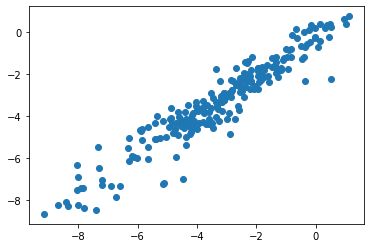

In [32]:
plt.scatter(x=y_test, y=predicted)

In [33]:
df_predicted = pd.DataFrame(predicted, columns=['Predicted'])
df_predicted['Measured'] = y_test.reset_index(drop=True)
df_predicted['Difference'] = df_predicted.Predicted - df_predicted.Measured
df_predicted

,Predicted,Measured,Difference
0,-4.813967,-4.800,-0.013967
1,-2.206967,-2.253,0.046033
2,-7.330600,-6.590,-0.740600
3,-0.210000,0.450,-0.660000
4,-7.055533,-7.200,0.144467
...,...,...,...
221,-4.026500,-4.600,0.573500
222,-4.358100,-4.860,0.501900
223,-2.461733,-2.640,0.178267
224,-5.101833,-5.410,0.308167


In [34]:
# using RReliefF for selection of important features

# RR = sr.RReliefF(n_features=50)
# top50_RR = RR.fit_transform(X_train, y_train)

In [35]:
# using <feature_importances_> for selection of features with importance above THRESHOLD

feature_importances = pd.DataFrame(rf_reg.feature_importances_, columns=['Importance']).set_index(x2.columns[1:])
feature_importances.to_csv('Output/esol_feature_importances.csv', index=None)
feature_importances.sort_values('Importance', ascending=False)

,Importance
XLogP,0.368061
CrippenLogP,0.329643
SpMax3_Bhm,0.026396
VP-6,0.013581
LipoaffinityIndex,0.012659
...,...
minsGeH3,0.000000
minssGeH2,0.000000
minsssGeH,0.000000
minssssGe,0.000000


In [36]:
THRESHOLD = 0.001
important_features = feature_importances[feature_importances.Importance >= THRESHOLD].index.to_list()
important_features

['ATS0p',
 'ATS3p',
 'AATS5p',
 'AATS2i',
 'AATS5i',
 'AATS6i',
 'ATSC0m',
 'ATSC0p',
 'AATSC3c',
 'BCUTp-1h',
 'SpMax1_Bhm',
 'SpMax2_Bhm',
 'SpMax3_Bhm',
 'SpMax4_Bhm',
 'SpMax6_Bhm',
 'SpMax1_Bhe',
 'SpMax1_Bhi',
 'VCH-7',
 'VP-1',
 'VP-3',
 'VP-4',
 'VP-5',
 'VP-6',
 'CrippenLogP',
 'SpDiam_Dt',
 'minHBa',
 'maxwHBa',
 'meanI',
 'hmin',
 'LipoaffinityIndex',
 'MAXDN',
 'MAXDP',
 'ETA_BetaP_ns_d',
 'ETA_Eta',
 'ETA_Eta_F',
 'ETA_EtaP_F',
 'BIC0',
 'ZMIC1',
 'MLFER_BO',
 'piPC2',
 'piPC6',
 'XLogP']

In [37]:
# Check correlation for most important features
x2.XLogP.corr(x2.CrippenLogP)

0.7947041709359353

In [38]:
x2.Measured.corr(x2.CrippenLogP)

-0.8066852491435833

In [39]:
x2.Measured.corr(x2.XLogP)

-0.7813754791958674

In [40]:
# Preparing new dataset with most important features only

x3 = pd.concat([x2.Measured, x2[important_features]], axis=1)
x3

,Measured,ATS0p,ATS3p,AATS5p,AATS2i,AATS5i,AATS6i,ATSC0m,ATSC0p,AATSC3c,...,ETA_BetaP_ns_d,ETA_Eta,ETA_Eta_F,ETA_EtaP_F,BIC0,ZMIC1,MLFER_BO,piPC2,piPC6,XLogP
0,-3.300,40.853950,69.229095,1.170418,149.924282,166.156961,152.710285,893.112798,6.056659,-0.003647,...,0.03333,7.44686,13.03107,0.86874,0.297135,33.068074,0.681,3.707456,4.789573,3.085
1,-2.060,35.646010,65.158105,0.913279,155.761364,168.100113,166.412420,856.492007,6.253875,-0.000881,...,0.00000,8.87298,4.66116,0.42374,0.237583,25.250690,0.439,2.944439,3.044522,2.701
2,-0.770,76.067792,180.051134,1.022690,154.384025,167.474505,163.885136,2378.051147,12.325317,0.007518,...,0.00000,35.16872,29.85097,0.93284,0.264152,74.732503,3.838,4.085976,5.102531,-0.640
3,-1.330,21.344052,11.882504,0.000000,139.553231,0.000000,0.000000,822.423618,4.678138,-0.000410,...,0.00000,1.39552,2.35448,0.47090,0.395097,19.288222,0.195,2.505526,0.000000,2.119
4,-1.500,31.365365,42.440954,0.939465,143.002612,167.307143,184.917652,933.632112,5.514561,0.000614,...,0.00000,3.31222,5.97591,0.66399,0.364286,26.195950,0.543,3.409496,5.146677,2.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,-7.660,68.067439,132.544649,2.770733,138.658796,149.161740,152.634209,3428.097251,4.825699,-0.000299,...,0.18421,15.03217,17.98733,0.94670,0.285627,96.636743,0.004,4.060443,6.258505,5.432
1124,0.106,39.271880,54.162472,1.362940,171.541913,168.127723,160.219421,1626.856056,8.200354,0.007292,...,0.00000,10.62436,9.87559,0.70540,0.389698,29.357173,1.485,3.178054,3.496508,0.370
1125,-3.091,63.095902,91.422133,1.461933,157.426711,157.539827,166.803913,3188.174088,20.392094,0.000899,...,0.00000,13.02513,2.77060,0.23088,0.370098,33.345785,2.124,2.833213,2.079442,3.321
1126,-3.180,19.279855,34.073267,0.444613,160.210490,184.917652,0.000000,427.291796,3.552086,-0.000289,...,0.00000,4.43249,0.00000,0.00000,0.218495,15.090860,0.084,1.609438,0.000000,3.124


In [41]:
x3.to_csv('Output/esol_most_important_descriptors.csv')

In [42]:
x3_scaled = scaler.fit_transform(x3.iloc[:,1:])
x3_scaled

array([[0.24644921, 0.14490181, 0.18432147, ..., 0.78425041, 0.59471872,
        0.39597955],
       [0.21107823, 0.13638092, 0.14382639, ..., 0.62284693, 0.37803673,
        0.3767295 ],
       [0.48561255, 0.37686085, 0.16105686, ..., 0.8643201 , 0.63357851,
        0.20924403],
       ...,
       [0.39751081, 0.19135354, 0.23023039, ..., 0.599319  , 0.25820315,
        0.40781031],
       [0.09992353, 0.07131796, 0.0700192 , ..., 0.34044973, 0.        ,
        0.39793463],
       [0.42164819, 0.22627083, 0.31971486, ..., 0.80757333, 0.64719792,
        0.41477842]])

In [43]:
# Predictor based on most important features only
rf_reg2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg2.fit(x3_scaled, x3.Measured)

RandomForestRegressor(random_state=42)

In [44]:
# Calculation of molecular descriptors for UNKNOWN dataset
padeldescriptor(mol_dir='Input/unknown.smi', d_file='Output/unknown_descriptors.csv', d_2d=True, d_3d=True)

In [45]:
unknown_tmp = pd.read_csv('Output/unknown_descriptors.csv', low_memory = False)
unknown_df = pd.concat([unknown_tmp.Name, unknown_tmp[important_features]], axis=1)
unknown_df

,Name,ATS0p,ATS3p,AATS5p,AATS2i,AATS5i,AATS6i,ATSC0m,ATSC0p,AATSC3c,...,ETA_BetaP_ns_d,ETA_Eta,ETA_Eta_F,ETA_EtaP_F,BIC0,ZMIC1,MLFER_BO,piPC2,piPC6,XLogP
0,CHEMBL1922200_0,79.808491,173.112167,1.145396,159.367074,169.699440,166.256777,1970.492926,12.511520,-0.000625,...,0.03571,27.09553,24.74663,0.88381,0.240199,47.310442,1.904,4.244917,6.286725,4.538
1,CHEMBL382823_0,85.513384,181.790633,1.235957,159.852460,164.296681,163.343890,2822.364535,13.535061,0.001424,...,0.06250,28.95417,35.54502,1.11078,0.293181,41.077657,3.131,4.394449,6.478318,2.221
2,CHEMBL223460_0,82.286265,159.760654,1.396577,157.693215,161.688567,163.212659,2997.765621,14.030517,-0.002324,...,0.03226,27.22509,34.82610,1.12342,0.332272,42.549569,2.453,4.382027,6.047963,0.984
3,CHEMBL1922215_0,83.486617,186.282925,1.144294,159.130169,169.559699,165.755369,2061.711980,13.198934,-0.000439,...,0.03448,29.85841,25.39721,0.87577,0.235003,49.103220,1.924,4.273188,6.292292,4.835
4,CHEMBL1288038_0,65.869523,112.798835,1.379160,161.510619,162.872663,163.594046,1980.096164,11.699631,0.003191,...,0.03846,17.74864,28.15478,1.08288,0.359224,40.991326,1.134,4.276666,6.179564,4.303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,CHEMBL378370_0,80.302828,173.101454,1.332775,158.418343,161.603928,164.286426,2537.968210,12.247563,0.001027,...,0.06667,24.88077,32.44340,1.08145,0.298624,39.184746,3.012,4.394449,6.472153,2.654
101,CHEMBL3695662_0,71.684236,142.793381,1.337129,154.451961,163.372274,163.224922,1482.179333,9.722206,-0.002798,...,0.03704,16.94435,28.95379,1.07236,0.263821,52.453561,2.232,4.406719,6.616902,4.998
102,CHEMBL1240703_0,119.005907,327.041186,1.490974,151.422323,155.440578,156.168179,2493.595276,17.042150,-0.000235,...,0.00000,48.70608,58.66404,1.33327,0.230666,78.366594,3.328,4.980176,7.988426,6.172
103,CHEMBL207235_0,84.624158,186.742129,1.264495,158.053634,164.232086,162.802514,2717.998939,13.102286,0.001076,...,0.06250,28.36815,35.06370,1.09574,0.297587,40.692494,3.151,4.430817,6.510072,1.983


In [46]:
# replacing Infinity with NaN
unknown_df = unknown_df.replace([np.inf, -np.inf, 'Infinity', '=-Infinity', '#NAME\?'], np.nan, regex=True)

# replacing missing values with numeric column Median (or '.' for non-numeric)
unknown_df = unknown_df.apply(lambda a: a.fillna(a.median()) if a.dtype.kind in 'biufc' else a.fillna('.'))

In [47]:
unknown_df

,Name,ATS0p,ATS3p,AATS5p,AATS2i,AATS5i,AATS6i,ATSC0m,ATSC0p,AATSC3c,...,ETA_BetaP_ns_d,ETA_Eta,ETA_Eta_F,ETA_EtaP_F,BIC0,ZMIC1,MLFER_BO,piPC2,piPC6,XLogP
0,CHEMBL1922200_0,79.808491,173.112167,1.145396,159.367074,169.699440,166.256777,1970.492926,12.511520,-0.000625,...,0.03571,27.09553,24.74663,0.88381,0.240199,47.310442,1.904,4.244917,6.286725,4.538
1,CHEMBL382823_0,85.513384,181.790633,1.235957,159.852460,164.296681,163.343890,2822.364535,13.535061,0.001424,...,0.06250,28.95417,35.54502,1.11078,0.293181,41.077657,3.131,4.394449,6.478318,2.221
2,CHEMBL223460_0,82.286265,159.760654,1.396577,157.693215,161.688567,163.212659,2997.765621,14.030517,-0.002324,...,0.03226,27.22509,34.82610,1.12342,0.332272,42.549569,2.453,4.382027,6.047963,0.984
3,CHEMBL1922215_0,83.486617,186.282925,1.144294,159.130169,169.559699,165.755369,2061.711980,13.198934,-0.000439,...,0.03448,29.85841,25.39721,0.87577,0.235003,49.103220,1.924,4.273188,6.292292,4.835
4,CHEMBL1288038_0,65.869523,112.798835,1.379160,161.510619,162.872663,163.594046,1980.096164,11.699631,0.003191,...,0.03846,17.74864,28.15478,1.08288,0.359224,40.991326,1.134,4.276666,6.179564,4.303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,CHEMBL378370_0,80.302828,173.101454,1.332775,158.418343,161.603928,164.286426,2537.968210,12.247563,0.001027,...,0.06667,24.88077,32.44340,1.08145,0.298624,39.184746,3.012,4.394449,6.472153,2.654
101,CHEMBL3695662_0,71.684236,142.793381,1.337129,154.451961,163.372274,163.224922,1482.179333,9.722206,-0.002798,...,0.03704,16.94435,28.95379,1.07236,0.263821,52.453561,2.232,4.406719,6.616902,4.998
102,CHEMBL1240703_0,119.005907,327.041186,1.490974,151.422323,155.440578,156.168179,2493.595276,17.042150,-0.000235,...,0.00000,48.70608,58.66404,1.33327,0.230666,78.366594,3.328,4.980176,7.988426,6.172
103,CHEMBL207235_0,84.624158,186.742129,1.264495,158.053634,164.232086,162.802514,2717.998939,13.102286,0.001076,...,0.06250,28.36815,35.06370,1.09574,0.297587,40.692494,3.151,4.430817,6.510072,1.983


In [48]:
unknown_df.to_csv('Output/unknown_descriptors_clean.csv')
scaler = MinMaxScaler()
unknown_scaled = scaler.fit_transform(unknown_df.iloc[:,1:])
unknown_scaled

array([[0.23398606, 0.17627438, 0.04726883, ..., 0.38230205, 0.34390048,
        0.62370271],
       [0.27194638, 0.19743059, 0.19846222, ..., 0.50792511, 0.41776989,
        0.23585537],
       [0.25047315, 0.14372629, 0.46662001, ..., 0.49748883, 0.25184449,
        0.02879143],
       ...,
       [0.49480541, 0.55151985, 0.62421793, ..., 1.        , 1.        ,
        0.89722129],
       [0.26602948, 0.20950126, 0.24610712, ..., 0.53847792, 0.43001308,
        0.19601607],
       [0.24319228, 0.17366205, 0.24795364, ..., 0.48692128, 0.4093863 ,
        0.35436893]])

In [49]:
unknown_scaled.shape

(105, 42)

In [51]:
# prediction of solubility for UNKNOWN dataset
unknown_predicted = pd.DataFrame(rf_reg2.predict(unknown_scaled), columns=['Predicted_Solubility'])
unknown_predicted.insert(0, 'Name', unknown_df.Name)
unknown_predicted

,Name,Predicted_Solubility
0,CHEMBL1922200_0,-4.97081
1,CHEMBL382823_0,-3.46287
2,CHEMBL223460_0,-2.97885
3,CHEMBL1922215_0,-6.10818
4,CHEMBL1288038_0,-3.96072
...,...,...
100,CHEMBL378370_0,-3.55618
101,CHEMBL3695662_0,-6.20512
102,CHEMBL1240703_0,-6.39610
103,CHEMBL207235_0,-2.54097


In [52]:
unknown_predicted.to_csv('Output/unknown_solubility.csv', index=None)

In [53]:
unknown_predicted.describe()

,Predicted_Solubility
count,105.000000
mean,-3.863654
std,2.123485
min,-7.917230
25%,-5.346700
50%,-3.796553
75%,-2.060800
max,0.230900
